In [168]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.cross_validation import cross_val_score

In [169]:
#LINEAR REGRESSION
"""using K-fold CV"""


from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['target']=boston.target

x=df.drop('target',axis=1)
y=df.target



from sklearn.linear_model import LinearRegression
lm=LinearRegression()

scores1=cross_val_score(lm,x,y,cv=5,scoring='mean_absolute_error')
print(scores1.round(2))

scores2=cross_val_score(lm,x,y,cv=10,scoring='r2')
print(scores2.round(2))

[-2.62 -3.91 -4.39 -5.57 -4.78]
[ 0.73  0.47 -1.01  0.64  0.55  0.74  0.38 -0.13 -0.78  0.42]


Case 1: Linear Model with MAE=-2.62 is the best one amongst the 5 | 
Case 2: Linear model with R2=-0.78 has the best score

Accuracy:              0.795455

Area Under Curve:      0.732820

Confusion Matrix:
[[189  16]
 [ 47  56]]

Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.92      0.86       205
          1       0.78      0.54      0.64       103

avg / total       0.79      0.80      0.78       308



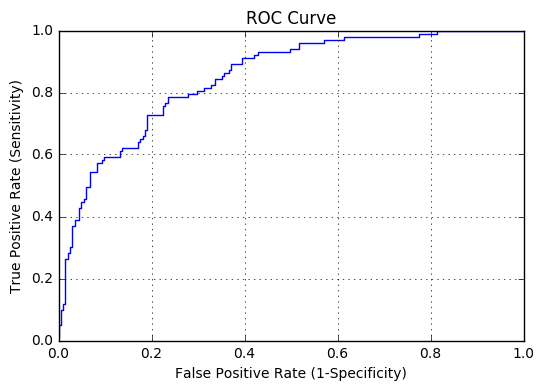

In [236]:
#LOGISTIC REGRESSION
"""using Train-Test Split"""

from sklearn import metrics
from sklearn.cross_validation import train_test_split

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima=pd.read_csv(url,header=None,names=col_names)

x=pima.drop('label',axis=1)
y=pima.label

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.4)



from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)

print("Accuracy:              %f"%metrics.accuracy_score(y_test,pred))
print("\nArea Under Curve:      %f"%metrics.roc_auc_score(y_test,pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test,pred))
print ("\nClassification Report:")
print(metrics.classification_report(y_test,pred))

y_pred_prob=logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [232]:
#K-NEAREST NEIGHBOURS (KNN)
"""using GridSearchCV"""


from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


from sklearn.grid_search import GridSearchCV
k_range=list(range(1,31))
options=['uniform','distance']

param_grid=dict(n_neighbors=k_range,weights=options)

grid=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid.fit(x,y)


print (grid.best_params_)

{'weights': 'distance', 'n_neighbors': 10}
